# Importando bibliotecas utilizadas no projeto

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# Convertendo o arquivo CarteiraMentoria.xlsx para um DataFrame e exibindo os dados da carteira de ações

In [194]:
carteira = pd.read_excel('CarteiraMentoria.xlsx')
carteira['Valor Investido'] = carteira['Valor Investido'].astype(float)
carteira['Qtde'] = carteira['Qtde'].astype(int)
pd.set_option('float_format','{:,.2f}'.format)
display(carteira)

,Ativos,Valor Investido,Tipo,Qtde
0,ITUB4,"5,000.00",Ação,134
1,BBDC4,"5,000.00",Ação,134
2,PETR4,"5,000.00",Ação,162
3,QUAL3,"5,000.00",Ação,128
4,MGLU3,"5,000.00",Ação,416
5,SMAL11,"10,000.00",ETF,71
6,HSML11,"5,000.00",FII,40
7,BCRI11,"5,000.00",FII,39
8,Tesouro Selic,"50,000.00",Renda Fixa,4


# Exibindo gráficos com os dados da carteira de ações

Text(0, 0.5, '')

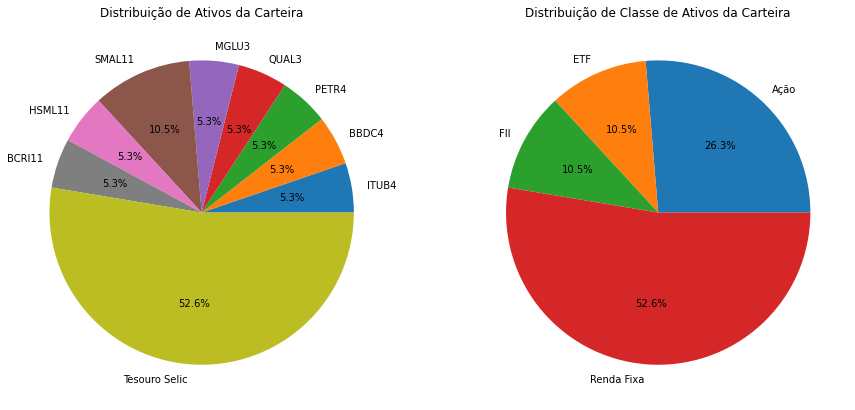

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2)

#vamos ver a distribuição da carteira por ativos
grafico1 = carteira.plot.pie(ax=ax1, labels=carteira['Ativos'], y='Valor Investido', legend=False, title='Distribuição de Ativos da Carteira', figsize=(15, 8), autopct="%.1f%%")
grafico1.set_ylabel('')
#vamos ver agora a distribuição da carteira por classe de ativo

grafico2 = carteira.groupby('Tipo').sum().plot.pie(ax=ax2, y='Valor Investido', legend=False, title='Distribuição de Classe de Ativos da Carteira', figsize=(15, 8), autopct="%.1f%%")
grafico2.set_ylabel('')

# Dados dos ultimos 12 meses do IBOVESPA com Gráfico

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-22,116225,113620,116222,114979,8160600,114979
2021-03-23,115599,113062,114977,113262,8301500,113262
2021-03-24,114823,112064,113272,112064,9834000,112064
2021-03-25,114024,110927,112065,113750,10306500,113750
2021-03-26,115416,113305,113750,114781,8659500,114781
...,...,...,...,...,...,...
2022-03-14,112299,109717,111716,109928,10480900,109928
2022-03-15,109925,107781,109925,108959,13653800,108959
2022-03-16,111183,108958,108958,111112,13205200,111112


<AxesSubplot:xlabel='Date'>

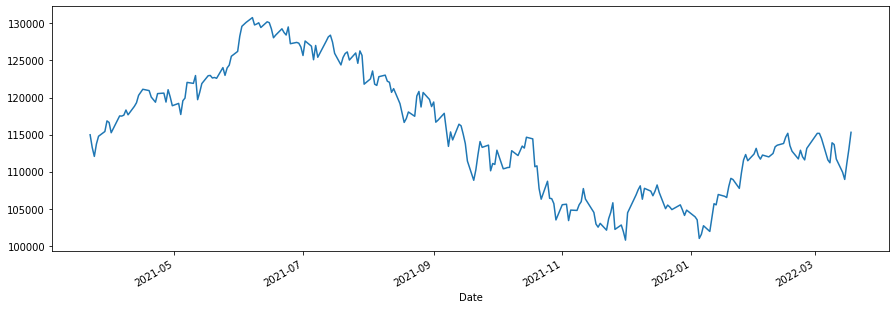

In [196]:
ibv_df = web.DataReader('^BVSP', data_source= 'yahoo', start= '2021-03-20', end= '2022-03-20')
display(ibv_df)
ibv_df['Adj Close'].plot(figsize=(15,5))

# Pegando os valores de todas as ações da nossa carteira

In [197]:
carteira_df = pd.DataFrame()

for ativo in carteira['Ativos']:
    if 'Tesouro' not in ativo:
        carteira_df[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2021-03-20', end='2022-03-20')['Adj Close']
carteira_df = carteira_df.ffill()
print(carteira_df.info())
display(carteira_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2021-03-22 to 2022-03-18
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ITUB4   248 non-null    float64
 1   BBDC4   248 non-null    float64
 2   PETR4   248 non-null    float64
 3   QUAL3   248 non-null    float64
 4   MGLU3   248 non-null    float64
 5   SMAL11  248 non-null    float64
 6   HSML11  248 non-null    float64
 7   BCRI11  248 non-null    float64
dtypes: float64(8)
memory usage: 17.4 KB
None


,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11
Date,,,,,,,,
2021-03-22,27.55,23.14,19.12,30.60,21.89,132.97,86.30,113.98
2021-03-23,26.85,22.89,18.53,30.17,21.49,131.81,86.07,113.50
2021-03-24,26.38,22.65,18.55,29.65,20.36,129.34,85.88,113.40
2021-03-25,26.85,23.16,18.86,29.86,20.29,131.59,85.66,113.88
2021-03-26,27.30,23.31,19.07,28.84,19.97,131.38,86.03,114.60
...,...,...,...,...,...,...,...,...
2022-03-14,25.19,20.85,31.87,14.74,5.33,105.20,73.75,109.69
2022-03-15,25.10,20.80,31.10,15.03,4.87,106.75,73.70,109.50
2022-03-16,25.59,21.10,30.83,15.42,5.13,108.00,74.25,110.03


# Pegando os valores das ações do tesouro nacional

In [198]:
link_tesouro = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
tesouro_df = pd.read_csv(link_tesouro,sep = ';')
tesouro_df['Data Base'] = pd.to_datetime(tesouro_df['Data Base'], format='%d/%m/%Y')
tesouro_df = tesouro_df.loc[tesouro_df['Tipo Titulo'] == 'Tesouro Selic', :]
tesouro_df = tesouro_df.rename(columns={'Data Base':'Date'})
tesouro_df


,Tipo Titulo,Data Vencimento,Date,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
3,Tesouro Selic,01/03/2021,2016-06-15,"0,03","0,07","7849,83","7835,17","7831,00"
27,Tesouro Selic,07/03/2017,2016-06-15,"0,00","0,01","7860,86","7860,29","7856,14"
46,Tesouro Selic,01/03/2021,2016-06-21,"0,03","0,07","7866,38","7851,73","7847,56"
52,Tesouro Selic,07/03/2017,2016-06-21,"0,00","0,01","7877,39","7876,83","7872,66"
71,Tesouro Selic,01/03/2021,2016-06-24,"0,03","0,07","7878,81","7864,17","7860,00"
...,...,...,...,...,...,...,...,...
120908,Tesouro Selic,07/03/2017,2016-03-17,"0,00","0,01","7613,03","7612,29","7608,27"
120922,Tesouro Selic,07/03/2017,2016-02-29,"0,00","0,02","7561,23","7559,69","7555,69"
120941,Tesouro Selic,01/03/2021,2016-03-01,"0,00","0,04","7565,20","7550,18","7546,18"
120947,Tesouro Selic,07/03/2017,2016-03-01,"0,00","0,02","7565,20","7563,66","7559,66"


# Juntando a tabela da carteira de ações com a do tesouro nacional

In [199]:
carteira_df = carteira_df.merge(tesouro_df[['Date','PU Base Manha']], on = 'Date', how = 'left')
carteira_df['PU Base Manha'] = carteira_df['PU Base Manha'].apply(lambda x: str(x).replace(',','.'))
carteira_df['PU Base Manha'] = carteira_df['PU Base Manha'].astype(float)
carteira_df = carteira_df.rename(columns={'PU Base Manha':'Tesouro Selic'})
carteira_df = carteira_df.ffill()
carteira_df

,Date,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic
0,2021-03-22,27.55,23.14,19.12,30.60,21.89,132.97,86.30,113.98,"10,772.78"
1,2021-03-22,27.55,23.14,19.12,30.60,21.89,132.97,86.30,113.98,"10,732.81"
2,2021-03-22,27.55,23.14,19.12,30.60,21.89,132.97,86.30,113.98,"10,718.67"
3,2021-03-22,27.55,23.14,19.12,30.60,21.89,132.97,86.30,113.98,"10,585.82"
4,2021-03-23,26.85,22.89,18.53,30.17,21.49,131.81,86.07,113.50,"10,774.48"
...,...,...,...,...,...,...,...,...,...,...
966,2022-03-14,25.19,20.85,31.87,14.74,5.33,105.20,73.75,109.69,"11,405.92"
967,2022-03-15,25.10,20.80,31.10,15.03,4.87,106.75,73.70,109.50,"11,405.92"
968,2022-03-16,25.59,21.10,30.83,15.42,5.13,108.00,74.25,110.03,"11,405.92"
969,2022-03-17,26.15,21.18,30.01,15.06,5.54,109.55,72.50,110.42,"11,405.92"


In [200]:
carteira_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           971 non-null    datetime64[ns]
 1   ITUB4          971 non-null    float64       
 2   BBDC4          971 non-null    float64       
 3   PETR4          971 non-null    float64       
 4   QUAL3          971 non-null    float64       
 5   MGLU3          971 non-null    float64       
 6   SMAL11         971 non-null    float64       
 7   HSML11         971 non-null    float64       
 8   BCRI11         971 non-null    float64       
 9   Tesouro Selic  971 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 83.4 KB


# Pegando o valor total investido em ações da carteira

In [201]:
valor_investido = carteira_df.copy()
for ativo in carteira['Ativos']:
    valor_investido[ativo] = valor_investido[ativo] * carteira.loc[carteira['Ativos'] == ativo, 'Qtde'].values[0]
valor_investido = valor_investido.set_index('Date')
valor_investido['Total'] = valor_investido.sum(axis=1)
valor_investido

,ITUB4,BBDC4,PETR4,QUAL3,MGLU3,SMAL11,HSML11,BCRI11,Tesouro Selic,Total
Date,,,,,,,,,,
2021-03-22,"3,691.05","3,100.44","3,096.93","3,916.44","9,107.96","9,440.90","3,452.00","4,445.22","43,091.12","83,342.06"
2021-03-22,"3,691.05","3,100.44","3,096.93","3,916.44","9,107.96","9,440.90","3,452.00","4,445.22","42,931.24","83,182.18"
2021-03-22,"3,691.05","3,100.44","3,096.93","3,916.44","9,107.96","9,440.90","3,452.00","4,445.22","42,874.68","83,125.62"
2021-03-22,"3,691.05","3,100.44","3,096.93","3,916.44","9,107.96","9,440.90","3,452.00","4,445.22","42,343.28","82,594.22"
2021-03-23,"3,597.38","3,066.64","3,002.13","3,861.85","8,941.68","9,358.74","3,442.80","4,426.50","43,097.92","82,795.63"
...,...,...,...,...,...,...,...,...,...,...
2022-03-14,"3,375.46","2,793.90","5,162.94","1,886.72","2,217.28","7,469.20","2,950.00","4,277.91","45,623.68","75,757.09"
2022-03-15,"3,363.40","2,787.20","5,038.20","1,923.84","2,025.92","7,579.25","2,948.00","4,270.50","45,623.68","75,559.99"
2022-03-16,"3,429.06","2,827.40","4,994.46","1,973.76","2,134.08","7,668.00","2,970.00","4,291.17","45,623.68","75,911.61"


In [202]:
valor_investido.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2021-03-22 to 2022-03-18
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ITUB4          971 non-null    float64
 1   BBDC4          971 non-null    float64
 2   PETR4          971 non-null    float64
 3   QUAL3          971 non-null    float64
 4   MGLU3          971 non-null    float64
 5   SMAL11         971 non-null    float64
 6   HSML11         971 non-null    float64
 7   BCRI11         971 non-null    float64
 8   Tesouro Selic  971 non-null    float64
 9   Total          971 non-null    float64
dtypes: float64(10)
memory usage: 83.4 KB


# Comparando o valor investido normalizado da nossa carteira de ações com o IBOVESPA

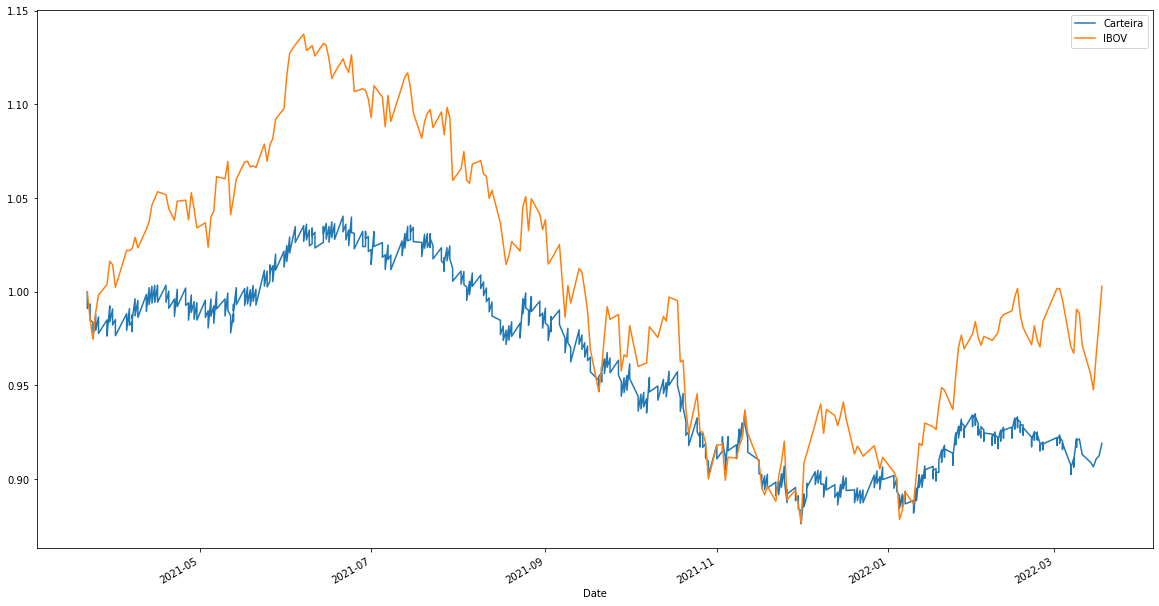

In [203]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
ibv_df_norm = ibv_df / ibv_df.iloc[0]

valor_investido_norm['Total'].plot(figsize=(20, 11), label='Carteira')
ibv_df_norm['Adj Close'].plot(label='IBOV')
plt.legend()

# Rentabilidade da nossa carteira e do IBOVESPA nos últimos 12 meses

In [204]:
rentabilidade_carteira = valor_investido_norm['Total'].iloc[-1] - 1
rentabilidade_ibov = ibv_df_norm['Adj Close'].iloc[-1] - 1

print('A rentabilidade da carteira foi de {:.1%}'.format(rentabilidade_carteira))
print('A rentabilidade do IBOV foi de {:.1%}'.format(rentabilidade_ibov))

A rentabilidade da carteira foi de -8.1%
A rentabilidade do IBOV foi de 0.3%
